In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
from sklearn import preprocessing

In [2]:
merged_df = pd.read_csv('swift_data.csv', sep='\t')

In [3]:
LGRBs = merged_df.loc[(merged_df['Restframe T90'] >= 2)]
SGRBs =  merged_df.loc[(merged_df['Restframe T90'] < 2)]

SGRBs = SGRBs.sort_values(by=['z'])
LGRBs = LGRBs.sort_values(by=['z'])

In [4]:
def GRB_KS_test(int):
    """
    Takes in a value for the upper-limit of the range of z values. Then makes a normalised cumulative distribution for 
    that range of z. From that distribution, we take the y-values for SGRBs & LGRBs and run a KS test on that range. The
    output is a p-value.
    """
    # makes a dataframe for LGRBs under a certain input z i.e. int
    LGRBsI = LGRBs.loc[(LGRBs['z'] < int)]
    # makes a dataframe of SGRBS under a certain input z i.e. int
    SGRBsI = SGRBs.loc[(SGRBs['z'] < int)]
    
    # here we make a list of x-values we will use in the distribution
    x = LGRBsI[['z']].values.astype(float)
    i = SGRBsI[['z']].values.astype(float)

    n, bins, patches = plt.hist(i, len(i), density=True, histtype='step', cumulative=True, label='Empirical')
    m, bins, patches = plt.hist(x, len(x), density=True, histtype='step', cumulative=True, label='Empirical')
    # n = y values for SGRBs in the distribution
    # m = y values for LGRBs in the distribution
    plt.close() #prevents plot from returning
    d, pval = stats.ks_2samp(n, m)
    return pval

In [5]:
maxi = merged_df['z'].max()

list_p = []
list_z = []
for i in np.arange(0.1, float(maxi), 0.1):
    list_p.append(GRB_KS_test(i))
    list_z.append(float(i))

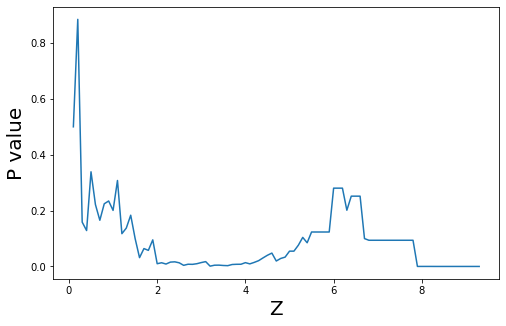

In [9]:
plt.figure(figsize=(8,5)) #sets figure size

plt.plot(list_z, list_p)
plt.xlabel('Z', fontsize=20)
plt.ylabel('P value', fontsize=20)
plt.show()

In [ ]:
GRB_KS_test(1)

In [ ]:
GRB_KS_test(6.5)